In [1]:
# 加载路透社数据集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
# 将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])
print (decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [0]:
# one hot编码数据
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
# one hot编码label
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
# 训练模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 10s 1ms/step - loss: 2.5525 - acc: 0.5388 - val_loss: 1.6532 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 52us/step - loss: 1.3799 - acc: 0.7141 - val_loss: 1.2756 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 0s 53us/step - loss: 1.0352 - acc: 0.7784 - val_loss: 1.1359 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.8133 - acc: 0.8276 - val_loss: 1.0238 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.6457 - acc: 0.8658 - val_loss: 0.9760 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.5177 - acc: 0.8930 - val_loss: 0.9177 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==================

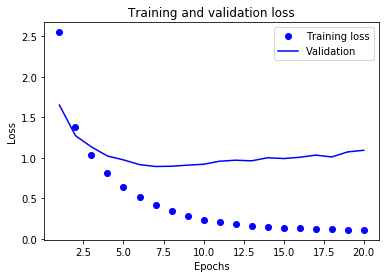

In [12]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

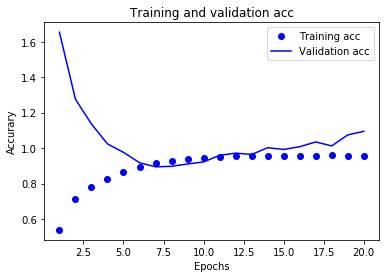

In [13]:
# 绘制训练精度和验证精度
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_loss']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.title('Training and validation acc')
plt.legend()

plt.show()

In [14]:
# 从头开始训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 74us/step - loss: 2.5848 - acc: 0.5408 - val_loss: 1.7446 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 0s 50us/step - loss: 1.4169 - acc: 0.7076 - val_loss: 1.3030 - val_acc: 0.7100
Epoch 3/9
7982/7982 [==============================] - 0s 50us/step - loss: 1.0548 - acc: 0.7732 - val_loss: 1.1212 - val_acc: 0.7610
Epoch 4/9
7982/7982 [==============================] - 0s 51us/step - loss: 0.8352 - acc: 0.8235 - val_loss: 1.0340 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.6638 - acc: 0.8632 - val_loss: 0.9570 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 0s 51us/step - loss: 0.5328 - acc: 0.8894 - val_loss: 0.9174 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.4282 - acc: 0.9109 - val_loss: 0.9155 - val_acc: 0.8000
Epoch 8/9
7982

In [15]:
# results返回损失值，和选定的指标值，上面 metrics=['accuracy']
print (results)

[0.977167752419639, 0.780498664345151]


In [16]:
# 在新数据上生成预测结果
predictions = model.predict(x_test)
print (np.argmax(predictions[0]))

3
